In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("Online_Games_Dataset.csv")

In [6]:
df

,Player_ID,Age,Gender,Game_Name,Genre,Daily_Play_Time_Hours,Skill_Level,Matches_Played_Per_Week,In_Game_Purchases,Player_Rating
0,PLAYER001,27,Female,Fortnite,Shooter,5.4,Beginner,39,Yes,1
1,PLAYER002,23,Male,Call of Duty,Strategy,5.0,Intermediate,33,Yes,3
2,PLAYER003,21,Female,Valorant,Battle Royale,2.7,Advanced,15,Yes,2
3,PLAYER004,25,Male,PUBG,Battle Royale,3.9,Advanced,2,No,3
4,PLAYER005,21,Male,Fortnite,Strategy,5.9,Beginner,33,Yes,1
5,PLAYER006,21,Male,PUBG,Battle Royale,5.5,Intermediate,36,Yes,4
6,PLAYER007,39,Male,Call of Duty,Action,1.1,Beginner,29,Yes,4
7,PLAYER008,30,Male,Free Fire,Battle Royale,0.8,Intermediate,29,No,3
8,PLAYER009,36,Male,Free Fire,Battle Royale,1.7,Beginner,32,No,4
9,PLAYER010,37,Female,Call of Duty,Shooter,5.9,Advanced,39,Yes,5


In [7]:
df.columns

Index(['Player_ID', 'Age', 'Gender', 'Game_Name', 'Genre',
       'Daily_Play_Time_Hours', 'Skill_Level', 'Matches_Played_Per_Week',
       'In_Game_Purchases', 'Player_Rating'],
      dtype='object')

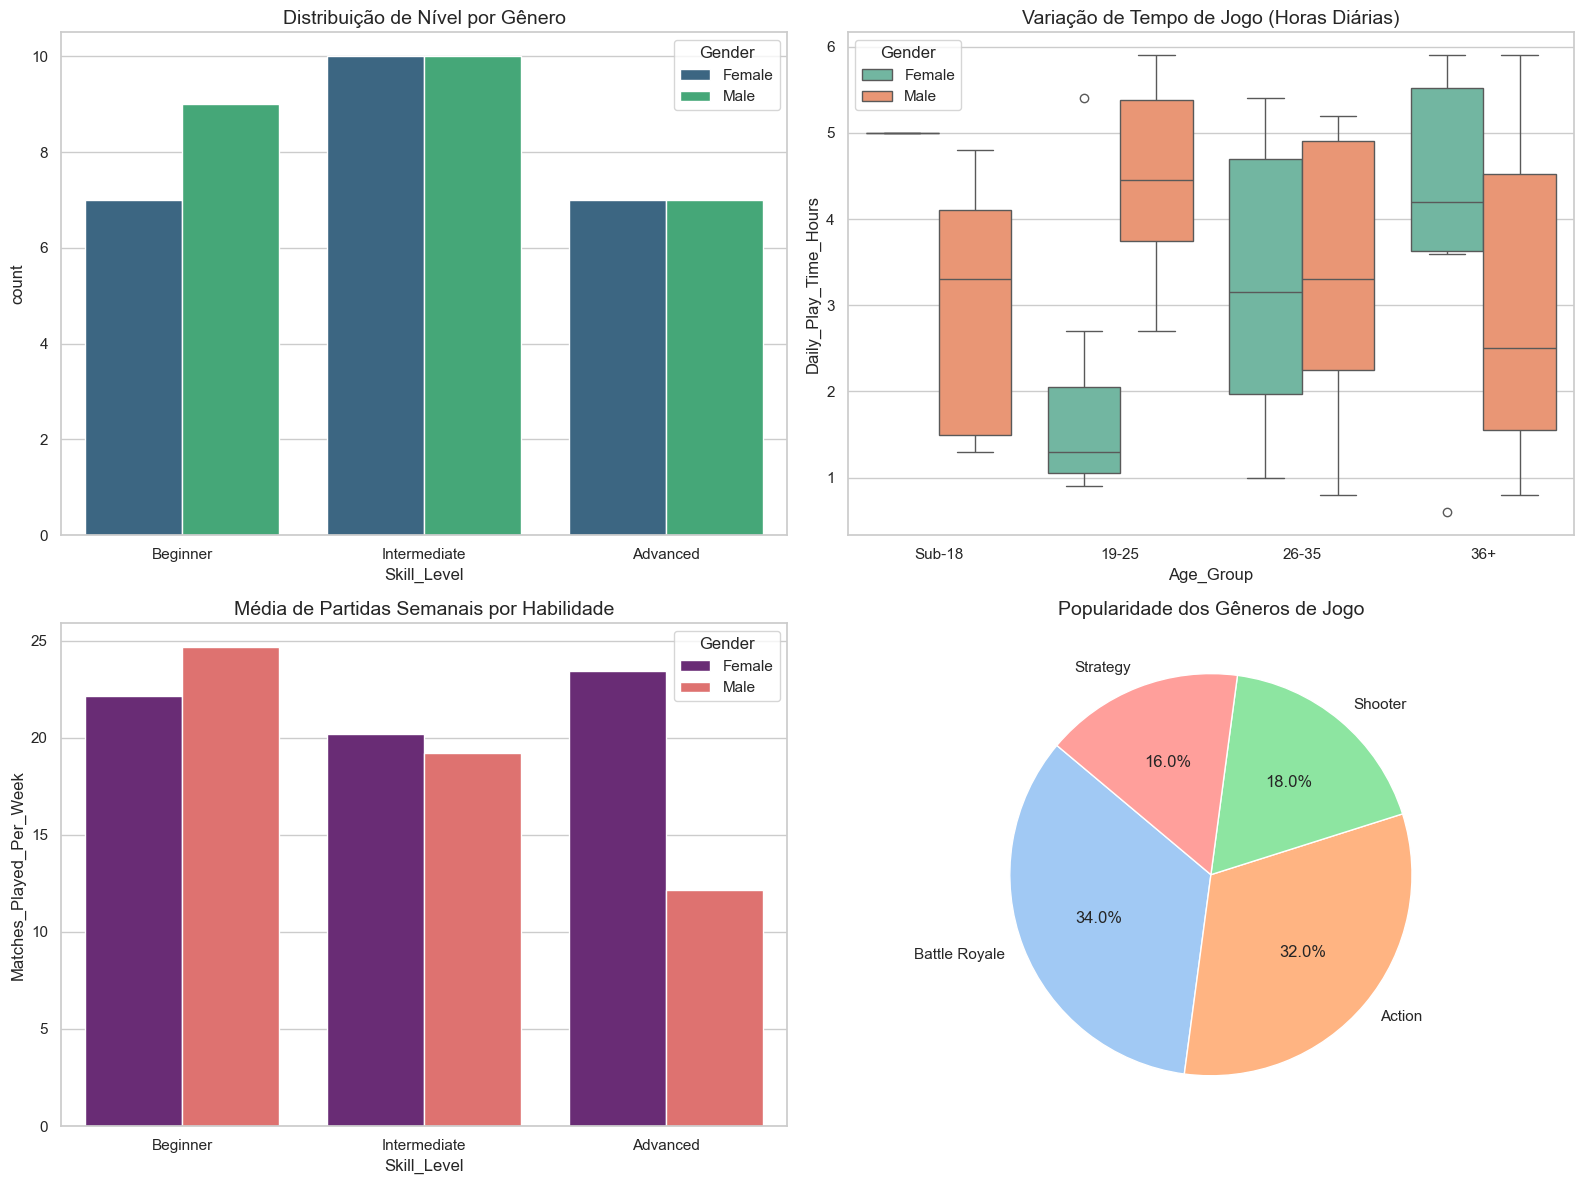

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados (Certifique-se que o arquivo está na mesma pasta!)
df = pd.read_csv("Online_Games_Dataset.csv")

# 2. Limpeza e Preparação (O passo que estava faltando no seu arquivo original)
# Removemos as colunas que você não queria
df_cleaned = df.drop(columns=['Player_ID', 'In_Game_Purchases', 'Player_Rating'], errors='ignore')

# Criamos as faixas etárias para o gráfico ficar bonito
bins = [0, 18, 25, 35, 100]
labels = ['Sub-18', '19-25', '26-35', '36+']
df_cleaned['Age_Group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels)

# 3. Configuração Visual dos Gráficos
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Nível de Habilidade por Gênero
sns.countplot(ax=axes[0, 0], data=df_cleaned, x='Skill_Level', hue='Gender', palette='viridis', order=['Beginner', 'Intermediate', 'Advanced'])
axes[0, 0].set_title('Distribuição de Nível por Gênero', fontsize=14)

# Gráfico 2: Tempo de Jogo por Faixa Etária
sns.boxplot(ax=axes[0, 1], data=df_cleaned, x='Age_Group', y='Daily_Play_Time_Hours', hue='Gender', palette='Set2')
axes[0, 1].set_title('Variação de Tempo de Jogo (Horas Diárias)', fontsize=14)

# Gráfico 3: Partidas Semanais por Nível
sns.barplot(ax=axes[1, 0], data=df_cleaned, x='Skill_Level', y='Matches_Played_Per_Week', hue='Gender', palette='magma', errorbar=None)
axes[1, 0].set_title('Média de Partidas Semanais por Habilidade', fontsize=14)

# Gráfico 4: Divisão por Gênero de Jogo (Pizza)
genre_counts = df_cleaned['Genre'].value_counts()
axes[1, 1].pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
axes[1, 1].set_title('Popularidade dos Gêneros de Jogo', fontsize=14)

# Ajustar layout para não amassar os títulos
plt.tight_layout()
plt.show()